In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from typing import Tuple


In [2]:
def image_color_summarizer(rgb_img: np.ndarray
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    hsv_img = rgb2hsv(rgb_img)
    return (hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2])


In [3]:
from skimage import data
# get coffee image for testing
COFFEE = data.coffee()
hue, saturation, value = image_color_summarizer(COFFEE)

Text(0.5, 1.0, 'Value')

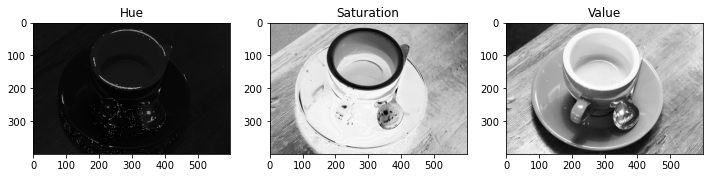

In [4]:
# Understanding Hue, Saturation, and Value
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value')

In [6]:
from skimage import data
from skimage import feature

import matplotlib.pyplot as plt
from matplotlib import patches

In [19]:
def detect_faces(trained_file: str, img: np.ndarray) -> plt.Axes:
    # Initialize the detector cascade.
    detector = feature.Cascade(trained_file)

    detected = detector.detect_multi_scale(img=img,
                                        scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(60, 60),
                                        max_size=(123, 123))

    plt.imshow(img)
    img_desc = plt.gca()
    plt.set_cmap('gray')

    for patch in detected:

        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    plt.show()
    return img_desc


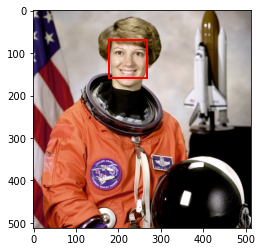

<AxesSubplot:>

In [20]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()
img = data.astronaut()
detect_faces(trained_file, img)